In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [43]:
df=pd.read_csv('Unemployment in India.csv')

In [44]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [45]:
df.shape


(267, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [46]:
df.isnull().sum()

Region                                      0
Date                                        0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [88]:
#Correcting the column names

df.columns=['States','Date','Frequency','Estimated_Unemployment_Rate(%)','Estimated_Employed','Estimated_Labour_Participation_Rate(%)','Region','longitutde','latitude']

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   States                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region                                   267 non-null    object 
 7   longitutde                               267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [117]:
df.Date=pd.to_datetime(df.Date)

In [122]:
df['month']=df.Date.dt.month              

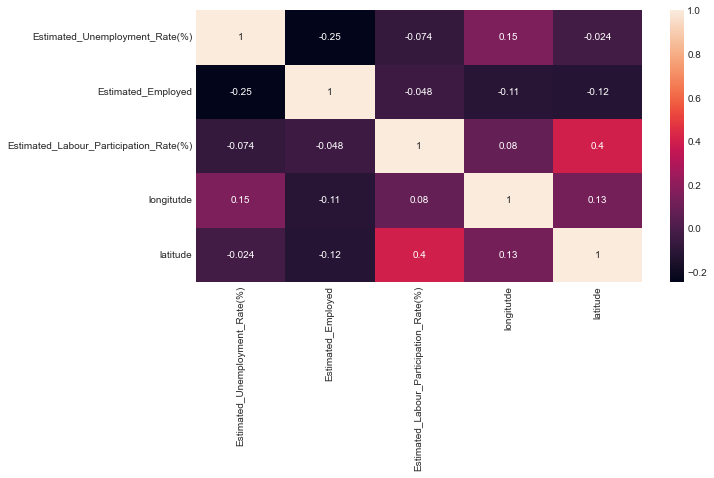

In [89]:
#Eastablishing correlation b/w the data

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,5))

sns.heatmap(df.corr(),annot=True)
plt.show()

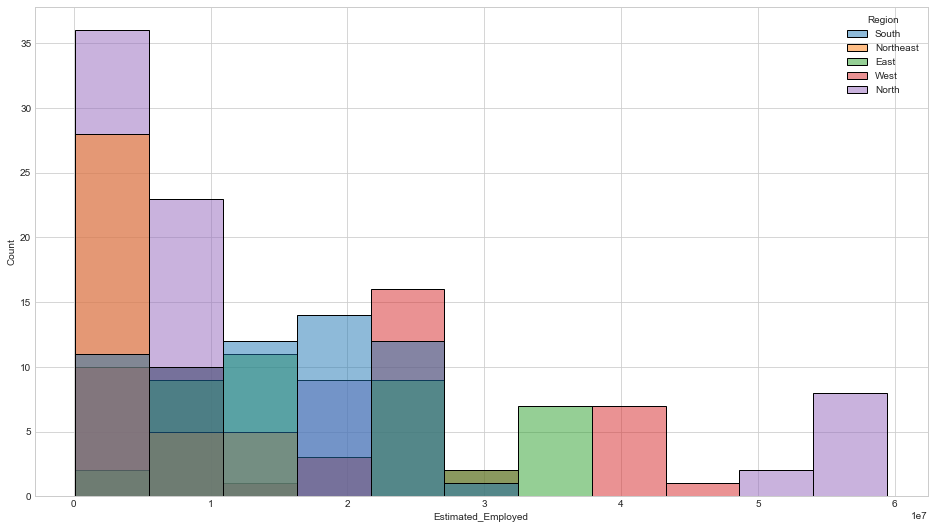

In [90]:
color='	#FF1493'
plt.figure(figsize=(16,9))
sns.histplot(x='Estimated_Employed',hue='Region',data=df)
plt.show()

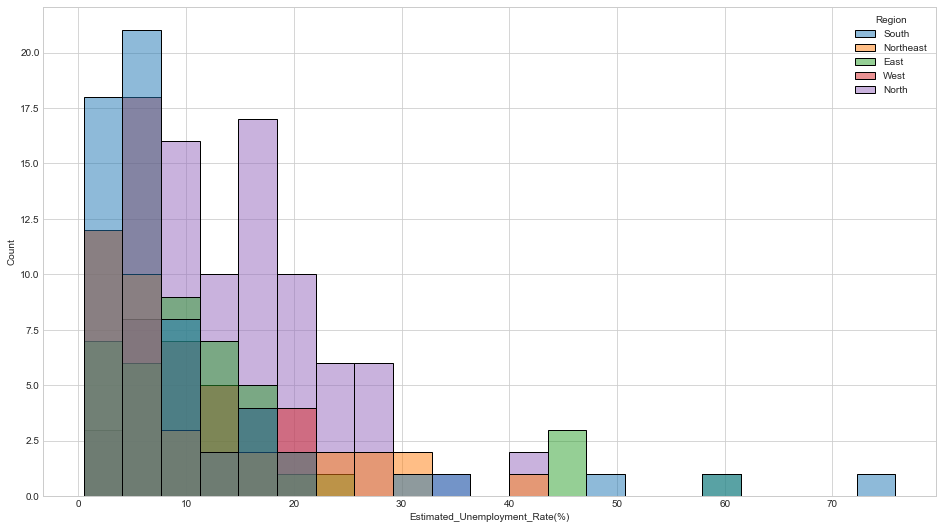

In [91]:

plt.figure(figsize=(16,9))
sns.histplot(x='Estimated_Unemployment_Rate(%)',hue='Region',data=df)
plt.show()

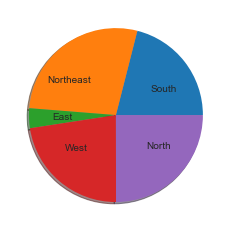

In [103]:
reg=df.groupby('Region')['Estimated_Employed'].sum()
reglab=df.Region.unique()

plt.pie(reg,labels=reglab,labeldistance=0.5,shadow=True)

plt.show()

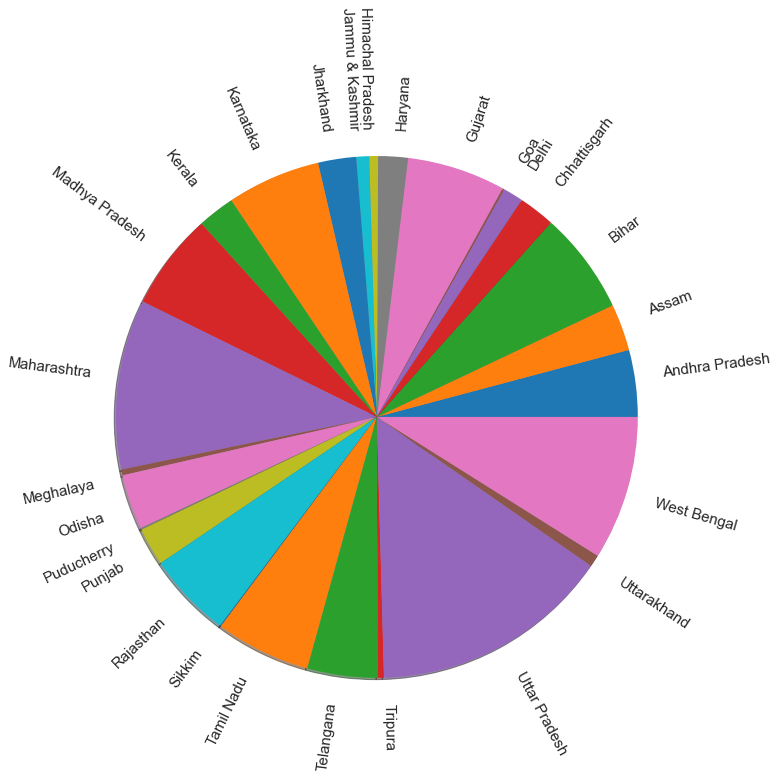

In [109]:
st=df.groupby('States')['Estimated_Employed'].sum()
stlab=df.States.unique()
textp={'fontsize':15}
plt.pie(st,data=df,labels=stlab,radius=3,shadow=True,rotatelabels=True,textprops=textp)
plt.show()

In [124]:
df.head(2)

,States,Date,Frequency,Estimated_Unemployment_Rate(%),Estimated_Employed,Estimated_Labour_Participation_Rate(%),Region,longitutde,latitude,year,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,2020,1
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2020,2


<AxesSubplot:xlabel='month', ylabel='Estimated_Unemployment_Rate(%)'>

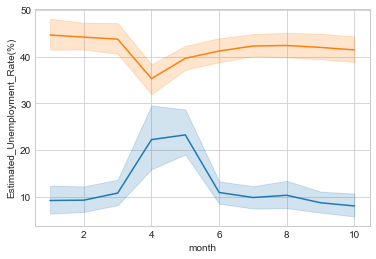

In [125]:
sns.lineplot(y='Estimated_Unemployment_Rate(%)',x='month',data=df)


<AxesSubplot:xlabel='Estimated_Labour_Participation_Rate(%)', ylabel='Estimated_Employed'>

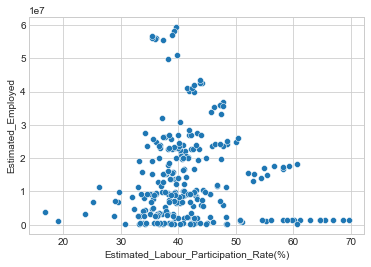

In [127]:
sns.scatterplot(y='Estimated_Employed',x='Estimated_Labour_Participation_Rate(%)',data=df)

<AxesSubplot:xlabel='month', ylabel='Estimated_Employed'>

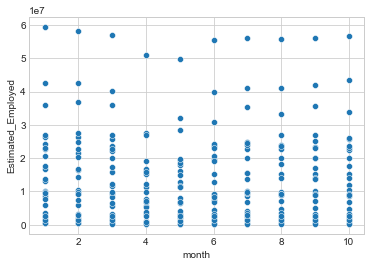

In [128]:
sns.scatterplot(y='Estimated_Employed',x='month',data=df)